In [1]:
import numpy as np

from utilities.cwt import *
from matplotlib import pyplot as plt


In [2]:
# Define parameters
duration = 10  # Duration of the signal in seconds
sampling_rate = 50  # Sampling rate in Hz

# Generate time vector
t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)

# Generate signal with varying frequencies
o_signal = np.sin(2 * np.pi * 3 * t) * (t <= 5) + np.sin(2 * np.pi * 5 * t) * ((t > 5) & (t<=7)) + np.sin(2 * np.pi * 1 * t) * (t > 7)

#plt.plot(t, o_signal)


multiplication took -0.00020813941955566406
(30, 500, 1)
invers fft took 0.0007541179656982422


/var/folders/38/7n1_2vzs5yj4rjtfy6_m6d_00000gn/T/ipykernel_20689/1451765241.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


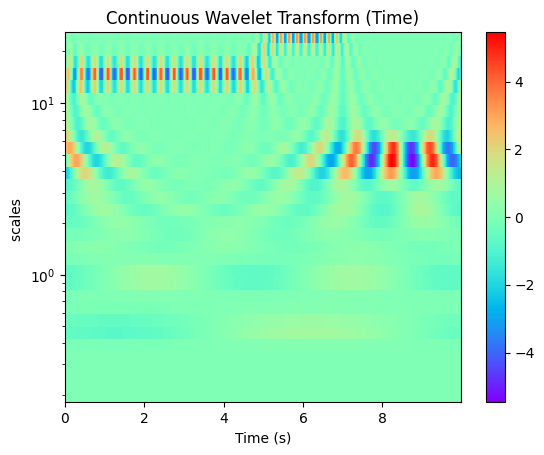

In [20]:

minFrq = 0.2
maxFrq = 24
minSpaceFrq = 0.002
maxSpaceFrq = 0.12
dt = 1/sampling_rate
nf = 30
# logspace from paper implemenation 
ftime = np.logspace(np.log10(minFrq), np.log10(maxFrq), nf)
fspace = np.logspace(np.log10(minSpaceFrq), np.log10(maxSpaceFrq), nf)

wf = "morlet"
w0 = 8

signal = o_signal[np.newaxis, : ]

transform = cwt_time_vec(signal, ftime,w0, dt)

transform = np.squeeze(transform)

real_transform_values = transform.real

fig, axs = plt.subplots()
pcm = axs.pcolormesh(t, ftime[::-1], real_transform_values, shading="nearest", cmap="rainbow")
axs.set_yscale("log")
axs.set_xlabel("Time (s)")
axs.set_ylabel("scales ")
axs.set_title("Continuous Wavelet Transform (Time)")
fig.colorbar(pcm, ax=axs)
fig.show()

(500,)


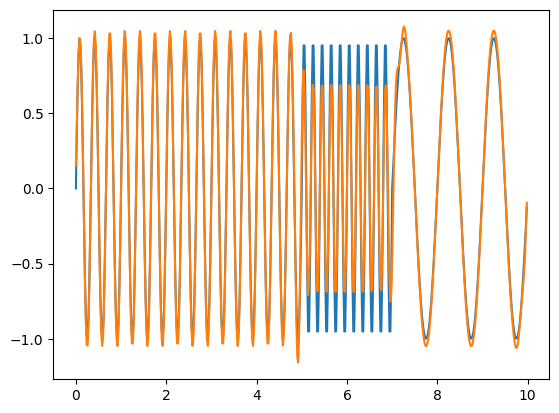

In [23]:
scales = (ftime*(w0 + np.sqrt(2 + w0**2)))/ (4 * np.pi)
scales = scales[np.newaxis,:]


inverse = transform / np.sqrt(scales.T)
inverse = np.squeeze(np.sum(inverse, axis=0))

colorado_factor = (0.25 *np.sqrt(dt)) / (.7511 * .5758)
inverse_w_factor = colorado_factor * inverse
print(inverse.shape)



#plt.plot(t, inverse)
plt.plot(t, o_signal)
plt.plot(t, inverse_w_factor)
